# Concentration de CO2 dans l'atmosphère depuis 1958

En 1958, Charles David Keeling  a initié une mesure de la concentration de CO2 dans l'atmosphère à l'observatoire de Mauna Loa, Hawaii, États-Unis qui continue jusqu'à aujourd'hui. L'objectif initial était d'étudier la variation saisonnière, mais l'intérêt s'est déplacé plus tard vers l'étude de la tendance croissante dans le contexte du changement climatique. En honneur à Keeling, ce jeu de données est souvent appelé "Keeling Curve" (voir [Wikipedia](https://en.wikipedia.org/wiki/Keeling_Curve) pour l'histoire et l'importance de ces données).

## Récupération des données
Récupération des données sur le site de l'institut Scripps, le 05/10/2025.

In [76]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import isoweek

In [77]:
names = ['year','month','date_excel','date','CO2','seas_adjusted','fit','fit_seas_adjusted','CO2_filled','seas_adjusted_filled','Station']
raw_data = pd.read_csv("https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv",skiprows=64,names=names)

Suppression des lignes à valeurs manquantes :

In [84]:
data = raw_data[~((raw_data["CO2_filled"] == -99.99) | (raw_data["seas_adjusted_filled"] == -99.99))]
data

year  month  date_excel       date     CO2  seas_adjusted     fit  \
2    1958      3       21259  1958.2027  315.71         314.43  316.20   
3    1958      4       21290  1958.2877  317.45         315.15  317.31   
4    1958      5       21320  1958.3699  317.51         314.68  317.89   
5    1958      6       21351  1958.4548  -99.99         -99.99  317.27   
6    1958      7       21381  1958.5370  315.87         315.20  315.85   
7    1958      8       21412  1958.6219  314.93         316.23  313.95   
8    1958      9       21443  1958.7068  313.21         316.12  312.42   
9    1958     10       21473  1958.7890  -99.99         -99.99  312.41   
10   1958     11       21504  1958.8740  313.33         315.21  313.60   
11   1958     12       21534  1958.9562  314.67         315.43  314.77   
12   1959      1       21565  1959.0411  315.58         315.52  315.64   
13   1959      2       21596  1959.1260  316.49         315.83  316.30   
14   1959      3       21624  1959.2027  316.65         315.37  317.00   
15   1959      4       21655  1959.2877  317.72         315.41  318.10   
16   1959      5       21685  1959.3699  318.29         315.46  318.69   
17   1959      6       21716  1959.4548  318.15         316.00  318.08   
18   1959      7       21746  1959.5370  316.54         315.87  316.67   
19   1959      8       21777  1959.6219  314.79         316.10  314.79   
20   1959      9       21808  1959.7068  313.84         316.76  313.28   
21   1959     10       21838  1959.7890  313.33         316.35  313.31   
22   1959     11       21869  1959.8740  314.81         316.69  314.53   
23   1959     12       21899  1959.9562  315.58         316.35  315.72   
24   1960      1       21930  1960.0410  316.43         316.37  316.63   
25   1960      2       21961  1960.1257  316.98         316.33  317.30   
26   1960      3       21990  1960.2049  317.58         316.27  318.04   
27   1960      4       22021  1960.2896  319.03         316.69  319.14   
28   1960      5       22051  1960.3716  320.03         317.19  319.70   
29   1960      6       22082  1960.4563  319.58         317.44  319.05   
30   1960      7       22112  1960.5383  318.18         317.54  317.59   
31   1960      8       22143  1960.6230  315.90         317.24  315.65   
..    ...    ...         ...        ...     ...            ...     ...   
781  2023      2       44972  2023.1260  420.33         419.55  420.40   
782  2023      3       45000  2023.2027  420.51         418.97  421.38   
783  2023      4       45031  2023.2877  422.73         419.97  422.88   
784  2023      5       45061  2023.3699  423.78         420.39  423.76   
785  2023      6       45092  2023.4548  423.39         420.82  423.22   
786  2023      7       45122  2023.5370  421.62         420.83  421.72   
787  2023      8       45153  2023.6219  419.56         421.12  419.67   
788  2023      9       45184  2023.7068  418.06         421.56  418.07   
789  2023     10       45214  2023.7890  418.41         422.01  418.30   
790  2023     11       45245  2023.8740  420.11         422.37  419.97   
791  2023     12       45275  2023.9562  421.65         422.57  421.60   
792  2024      1       45306  2024.0410  422.62         422.55  422.88   
793  2024      2       45337  2024.1257  424.34         423.56  423.89   
794  2024      3       45366  2024.2049  425.22         423.65  424.95   
795  2024      4       45397  2024.2896  426.30         423.50  426.47   
796  2024      5       45427  2024.3716  426.70         423.30  427.33   
797  2024      6       45458  2024.4563  426.62         424.07  426.75   
798  2024      7       45488  2024.5383  425.40         424.63  425.22   
799  2024      8       45519  2024.6230  422.70         424.30  423.13   
800  2024      9       45550  2024.7077  421.60         425.11  421.50   
801  2024     10       45580  2024.7896  422.05         425.66  421.70   
802  2024     11       45611  2024.8743  423.61         425.87  423.31   
803  2024

# Analyse des données 
La figure suivante présente l'évolution mensuelle de la concentration en CO$_2$ depuis 1958. L'évolution est caractérisée par une oscillation périodique saisonale superposée à une évolution systématique plus lente. 

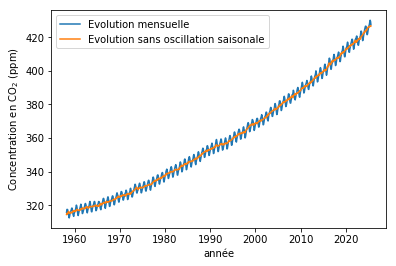

In [79]:
plt.plot(data.date,data.CO2_filled,label='Evolution mensuelle')
plt.plot(data.date,data.seas_adjusted_filled,label='Evolution sans oscillation saisonale')

plt.legend()
plt.xlabel('année')
plt.ylabel('Concentration en CO$_2$ (ppm)')
plt.show()

La figure suivante présente l'évolution de l'oscillation périodique saisonnale seule.

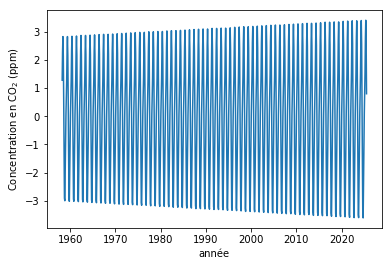

In [80]:
seas_osc_alone = data.CO2_filled-data.seas_adjusted_filled
plt.plot(data.date,seas_osc_alone)

plt.xlabel('année')
plt.ylabel('Concentration en CO$_2$ (ppm)')
plt.show()

On propose d'approcher l'évolution systématique de la concentration par un polynôme d'ordre 2.

L'évolution systématique de la concentration peut être modélisé par un polynôme d'ordre 2 sur l'année (a) :
0.013637384746552685*a^2 + -52.67898341320683*a + 51177.631186923776


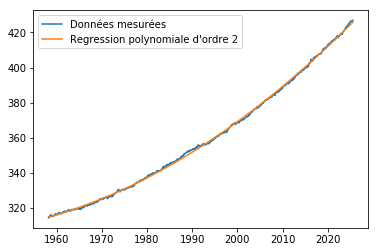

In [81]:
n = 2

# Régression polynomiale
coeffs = np.polyfit(data.date, data.seas_adjusted_filled, n)  
poly = np.poly1d(coeffs)    
y_fit = poly(data.date)

print("L'évolution systématique de la concentration peut être modélisé par un polynôme d'ordre 2 sur l'année (a) :")
print(str(coeffs[0])+"*a^2 + "+str(coeffs[1])+"*a + "+str(coeffs[2]))

plt.plot(data.date,data.seas_adjusted_filled,label='Données mesurées')
plt.plot(data.date,y_fit,label="Regression polynomiale d'ordre 2")
plt.legend()
plt.show()


En extrapolant ce comportement jusqu'en 2100 on obtient une prédiction de l'évolution systématique pour les années à venir.

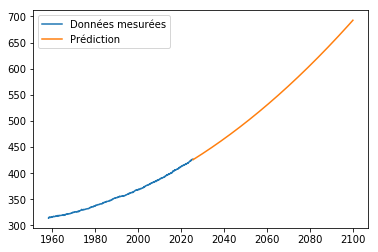

In [82]:
plt.plot(data.date,data.seas_adjusted_filled,label='Données mesurées')
x_futur = np.linspace(np.max(data.date), 2100, 1000)
y_futur = poly(x_futur)
plt.plot(x_futur,y_futur,label="Prédiction")
plt.legend()
plt.show()